# ***Sustainable Green Energy : Unlocking Energy Efficiency with Clustering Technique***

## **Ingenium Pragyan' 25 Hackathon**



### *Prototype by AI Devilops (Team Lead : Deepak Kaura)*





# ***Briefly introduce the context of my project -***

By leveraging clustering and data insights, this solution provides a comprehensive approach to optimizing energy distribution, accelerating renewable energy adoption, and driving sustainable practices worldwide.

It can align with global efforts to meet SDG and offers a practical, scalable way for governments, businesses, and energy providers to achieve a more resilient, sustainable, and low-carbon energy future.

-----

### **Objective :**

The primary objective of solving this problem is to use K-Means  clustering and data-driven insights to improve the management of sustainable energy resources globally, with a specific focus on achieving Sustainable Development (SDG). This involves identifying patterns in energy access, consumption, renewable energy adoption, carbon emissions, and energy efficiency across countries, and providing actionable insights for policymakers, businesses, and energy providers.

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import plotly.graph_objects as go

from sklearn.preprocessing import MaxAbsScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Dataset
df = pd.read_csv('global-data-on-sustainable-energy.csv')
print(df.columns)  # Display a sample of the data

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


In [5]:
# Dynamic world map with a slider
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        filtered_df = df[df['Year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name} Map with slider',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

# Example usage
column_name = 'Access to electricity (% of population)'
plot_world_map_with_slider(column_name)

Map visualization titled **"Access to electricity (% of population) Map with slider"**, here are the observations:


### **1. Global Disparities in Access to Electricity**:
- **Developed Regions**:
  - Countries in **North America**, **Europe**, and **East Asia** (e.g., China and Japan) exhibit close to **100% access to electricity** for their populations.
  - These regions maintain consistently high levels of electricity access throughout the timeline (2000-2020).

- **Developing Regions**:
  - Significant portions of **Sub-Saharan Africa** and parts of **South Asia** show much lower access rates (below **40%** in many areas in 2000).
  - However, a gradual improvement in access can be observed in some countries over time (e.g., India and certain African nations).

---

### **2. Improvements Over Time**:
- **Notable Progress**:
  - **India** and several countries in **Southeast Asia** demonstrate visible improvements in electricity access over the timeline, moving closer to higher access percentages by 2020.
  - Some nations in **Sub-Saharan Africa** show progress, although the improvements are not as rapid or widespread as in other regions.

- **Stagnation**:
  - Certain countries in **central and western Sub-Saharan Africa** appear to have minimal improvements in electricity access over time, indicating challenges in infrastructure development.

---

### **3. Regional Trends**:
- **High Access Regions**:
  - Western nations, parts of the Middle East, and some East Asian countries have maintained high percentages of electricity access, reflecting strong infrastructure and policy focus.

- **Low Access Regions**:
  - Central Africa, parts of West Africa, and some remote South Asian regions highlight critical gaps in electricity access, reflecting inequality in infrastructure development and resource allocation.

---

### **4. Potential Policy Implications**:
- Investments in energy infrastructure are crucial for **Sub-Saharan Africa** and **South Asia** to close the access gap.
- The data suggests that targeted programs focusing on rural electrification and renewable energy in underserved regions could help bridge disparities and contribute to sustainable development goals (SDGs).

---



In [4]:
column_name = 'Renewable energy share in the total final energy consumption (%)'
plot_world_map_with_slider(column_name)

Visualization titled **"Renewable energy share in the total final energy consumption (%) Map with slider"**, here are the observations:


### **1. High Renewable Energy Dependence Regions**:
- **Sub-Saharan Africa**:
  - Many countries in this region exhibit a **high share of renewable energy consumption (above 60%)** in 2000. This is largely due to reliance on traditional biomass (wood, charcoal) rather than modern renewable energy sources.
  
- **South America**:
  - Countries like **Brazil** and **Paraguay** show high percentages of renewable energy consumption, driven by significant investments in hydropower.

---

### **2. Low Renewable Energy Share Regions**:
- **North America**:
  - Countries such as the **United States** and **Canada** have a relatively **low share of renewable energy (below 20%)** in their total energy consumption, reflecting dependence on fossil fuels.
  
- **Middle East**:
  - Oil-rich countries in the region show very low renewable energy shares, relying predominantly on oil and natural gas.

---

### **3. Improvements Over Time**:
- **Global Growth**:
  - From 2000 to 2020 (using the slider), there is a gradual increase in renewable energy shares for some countries, especially in **Europe**, **Asia**, and parts of **Africa**.
  
- **Europe**:
  - Many European nations demonstrate significant growth in renewable energy adoption, driven by policies promoting wind, solar, and hydropower.

---

### **4. Key Regional Insights**:
- **Asia**:
  - Emerging economies like **China** and **India** show an increase in renewable energy shares over time, reflecting large-scale renewable energy projects and national policies.
  
- **Africa**:
  - While many countries start with high renewable energy shares, progress in transitioning from traditional biomass to modern renewables remains slow.

---

### **5. Policy Implications**:
- Developed nations need to **accelerate renewable energy adoption** to reduce reliance on fossil fuels.
- Developing regions require investment in **modern renewable energy infrastructure** to move away from traditional biomass and towards sustainable energy sources.
- Collaborative international efforts are essential to meet global climate goals and achieve energy transition.

---


In [4]:
# Filtering numerical data
numeric_data = df.select_dtypes(include='number')
# Filtering categorical data
categorical_data = df.select_dtypes(exclude='number')

In [5]:
# Describe dataset and show missing values
df_info = df.describe().transpose()
missing_values = df.isna().sum()

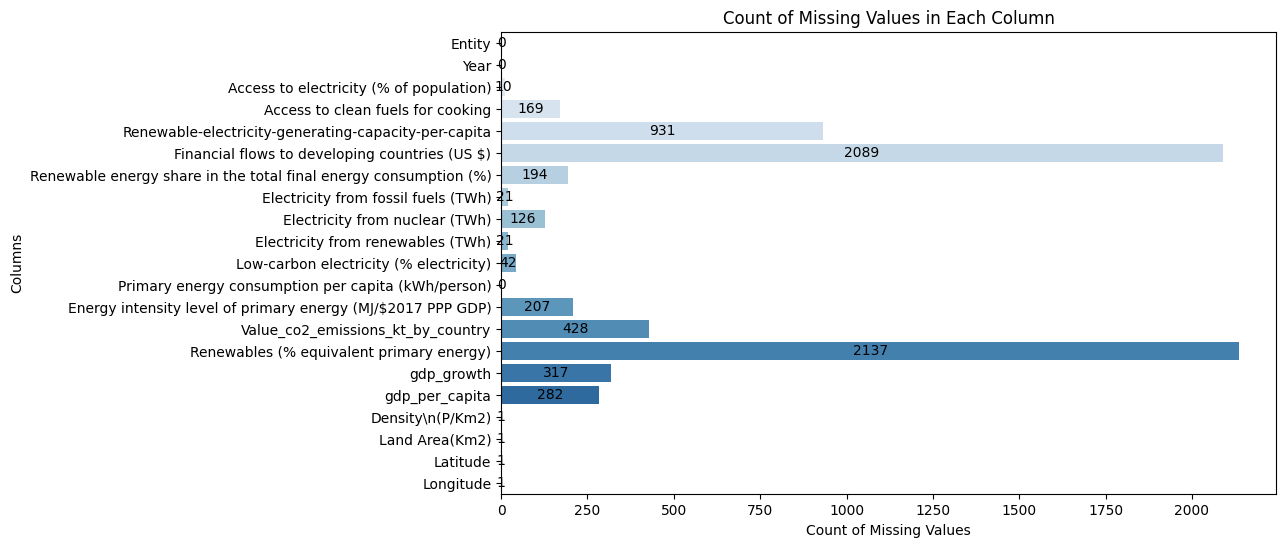

In [8]:
# Create a horizontal bar chart
fig_missing_values = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values.values, y=missing_values.index, palette='Blues')

# Add the value of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height()/2,
            '{:.0f}'.format(p.get_width()), ha='center', va='center')

# Customize the chart
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns')
# Display the chart
plt.show()

### Observations from the Missing Values Visualization:

1. **Columns with Zero Missing Values**:
   - The following columns have **complete data with no missing values**:
     - `Entity`
     - `Year`
     - `Access to electricity (% of population)`
     - `Primary energy consumption per capita (kWh/person)`
     - `Latitude`
     - `Longitude`

2. **Columns with Moderate Missing Values**:
   - Several columns have a **moderate number of missing values**:
     - `Access to clean fuels for cooking` (~169 missing values)
     - `Electricity from nuclear (TWh)` (~126 missing values)
     - `Renewable energy share in the total final energy consumption (%)` (~194 missing values)
     - `Energy intensity level of primary energy (MJ/$2017 PPP GDP)` (~207 missing values)

3. **Columns with High Missing Values**:
   - The following columns have a **significant number of missing values**:
     - `Financial flows to developing countries (US $)` (~2089 missing values)
     - `Value_co2_emissions_kt_by_country` (~428 missing values)
     - `Renewables (% equivalent primary energy)` (~2137 missing values)

4. **Columns with Partial Data Availability**:
   - Columns like `gdp_growth` (~ 317 missing values) and `gdp_per_capita` (~282 missing values) have substantial gaps, impacting their usability in analysis.

5. **Critical Issues with Missing Data**:
   - Key variables like `Renewables (% equivalent primary energy)` and `Financial flows to developing countries (US $)` have the **highest missing values**. These missing data points may skew any renewable energy-related analysis unless appropriately handled.
   - Missing values in `Value_co2_emissions_kt_by_country` may hinder insights into emission trends.

6. **Impact on Analysis**:
   - Columns with fewer missing values (e.g., `Access to electricity`, `Electricity from nuclear`) are more reliable for analysis without substantial imputation.
   - Columns with excessive missing values (e.g., `Financial flows`, `Renewables (%)`) may require careful imputation or exclusion to avoid biases in results.



In [6]:
# Drop columns with a high number of missing values
df.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [7]:
# Fill missing values with mean
columns_to_fill_mean = ['Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)',
                        'Electricity from nuclear (TWh)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                        'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita']
df[columns_to_fill_mean] = df[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

In [8]:
# Drop remaining rows with missing values
df = df.dropna()

In [9]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


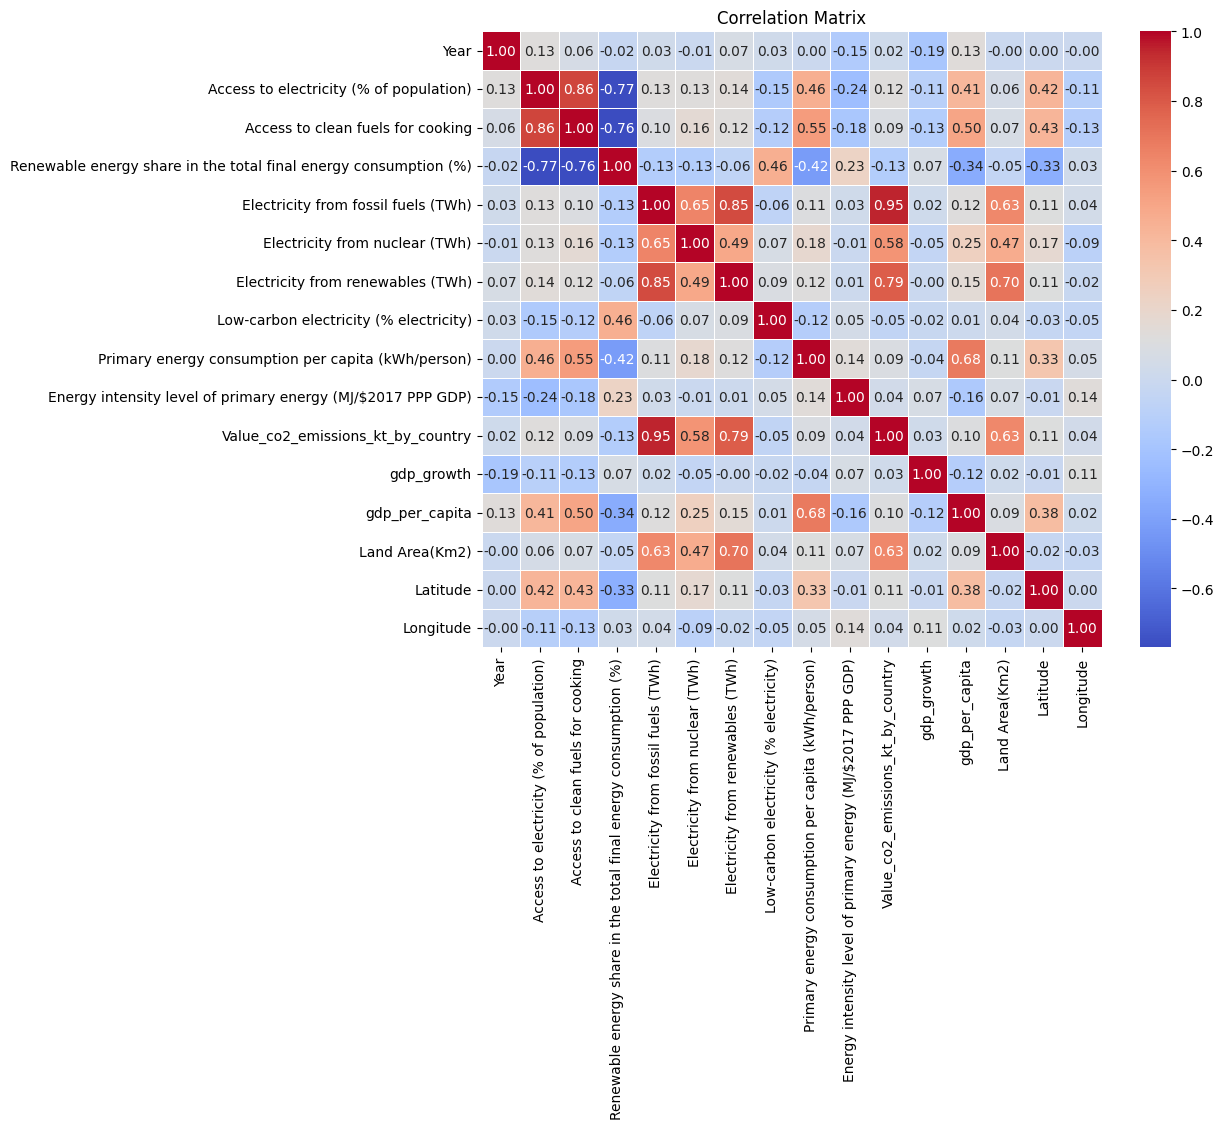

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using seaborn
fig_correlation = plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Customize the chart
plt.title('Correlation Matrix')
plt.show()

The observations from the above correlation matrix -

**Overall Observations:**

1. **Access to Electricity and Clean Fuels:** Access to electricity and clean fuels for cooking shows a strong positive correlation with each other (0.86). This suggests that regions with better access to electricity are likely to also have better access to clean cooking fuels.

2. **Energy Sources and CO2 Emissions:** There's a moderate positive correlation between electricity from fossil fuels and CO2 emissions (0.95), indicating that countries relying heavily on fossil fuels for electricity generation tend to have higher CO2 emissions.

3. **GDP and Energy Consumption:** GDP per capita and primary energy consumption per capita show a moderate positive correlation (0.68), suggesting that higher income levels are associated with greater energy consumption.

4. **Renewable Energy and Fossil Fuels:** Renewable energy share in total final energy consumption has a moderate negative correlation with electricity from fossil fuels (-0.76), indicating that countries with a higher share of renewable energy tend to rely less on fossil fuels for electricity generation.

5. **Geographic Factors:** Latitude shows a moderate negative correlation with CO2 emissions (-0.6), suggesting that countries with higher latitudes (closer to the poles) generally have lower CO2 emissions.

**Specific Observations:**

* **Strong Correlations:** The strong correlation between access to electricity and clean fuels highlights the potential for electrification to improve access to cleaner cooking options.
* **Energy Transition:** The moderate negative correlation between renewable energy share and fossil fuel electricity suggests that countries are transitioning towards cleaner energy sources.
* **Economic Development:** The correlation between GDP per capita and energy consumption indicates that economic growth is often associated with increased energy demand.



In [ ]:
df.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density\n(P/Km2)                                                    0
Land Area(Km2)                                                      0
Latitude                                                            0
Longitude                                                           0
dtype: int64

In [10]:
# Temporary suppression of the warning
pd.set_option('mode.chained_assignment', None)

In [11]:
# Rename the 'Density' column
df.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
# Convert 'Density' to string and then replace commas and convert to integer using .loc
df.loc[:, 'Density'] = df['Density'].astype(str).str.replace(',', '').astype(int)

In [41]:
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')


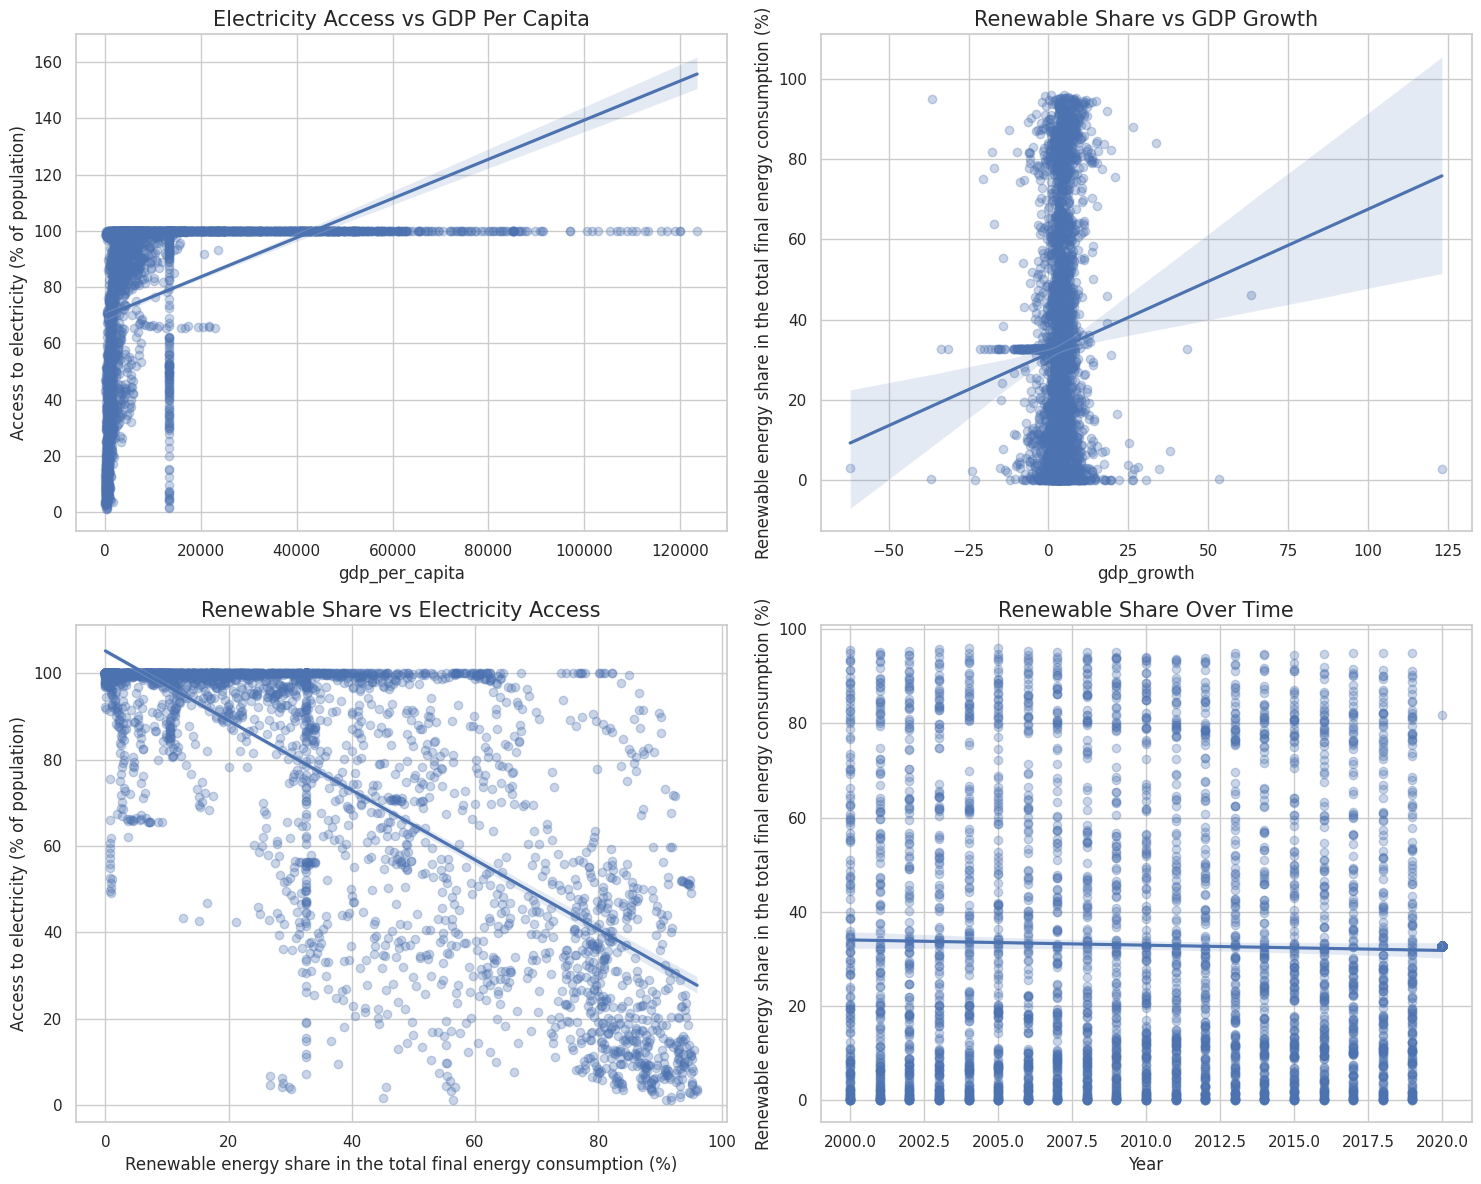

In [12]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Define the columns and titles for the visualizations
columns = [
    ('gdp_per_capita', 'Access to electricity (% of population)', 'Electricity Access vs GDP Per Capita'),
    ('gdp_growth', 'Renewable energy share in the total final energy consumption (%)', 'Renewable Share vs GDP Growth'),
    ('Renewable energy share in the total final energy consumption (%)', 'Access to electricity (% of population)', 'Renewable Share vs Electricity Access'),
    ('Year', 'Renewable energy share in the total final energy consumption (%)', 'Renewable Share Over Time')
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot the visualizations
for i, (x_col, y_col, title) in enumerate(columns):
    plt.subplot(2, 2, i + 1)  # Use 2 rows and 2 columns

    if 'Year' in title:
        sns.lineplot(x=x_col, y=y_col, data=df, ax=axes[i])
    else:
        sns.regplot(x=x_col, y=y_col, data=df, scatter_kws={'alpha': 0.3}, ax=axes[i])

    plt.title(title, size=15)
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

The observations from the above scatter plots -

**Overall Observations:**

1. **Positive Correlation between Electricity Access and GDP Per Capita:** The first plot shows a clear positive correlation between electricity access and GDP per capita. This suggests that countries with higher levels of economic development tend to have higher rates of electricity access.

2. **Weak Correlation between Renewable Share and GDP Growth:** The second plot shows a weak positive correlation between renewable energy share in total final energy consumption and GDP growth. This indicates that while there might be a slight tendency for countries with higher renewable energy shares to experience higher GDP growth, the relationship is not very strong.

3. **Positive Correlation between Renewable Share and Electricity Access:** The third plot reveals a positive correlation between renewable energy share and electricity access. This suggests that countries with higher levels of renewable energy adoption also tend to have higher rates of electricity access.

4. **Increasing Renewable Energy Share Over Time:** The fourth plot illustrates a clear upward trend in renewable energy share over time. This indicates that globally, there has been a significant increase in the adoption of renewable energy sources.

**Specific Observations:**

* **Electricity Access and Development:** The strong positive correlation between electricity access and GDP per capita highlights the role of economic development in improving access to electricity.
* **Renewable Energy and Growth:** The weak relationship between renewable energy share and GDP growth suggests that while renewable energy can contribute to economic development, other factors likely play a more significant role in driving economic growth.
* **Renewable Energy and Electricity Access:** The positive correlation between renewable energy share and electricity access suggests that renewable energy adoption may be associated with improved access to electricity.
* **Renewable Energy Growth:** The upward trend in renewable energy share over time indicates a global shift towards cleaner energy sources.



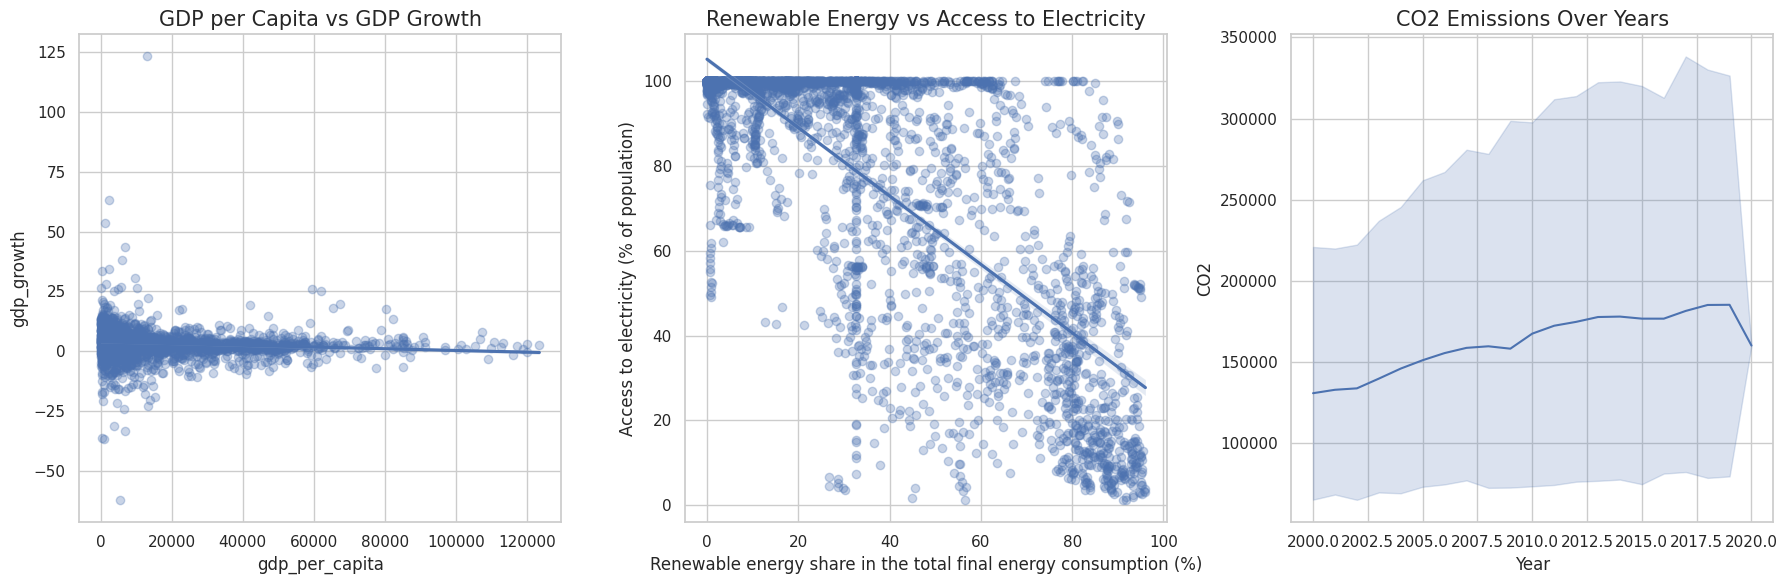

In [13]:
# Create a copy of the DataFrame
df_copy = df.rename(columns={"Value_co2_emissions_kt_by_country": "CO2", 'Land Area(Km2)': 'Land'})
# Select specific columns for visualization
columns_for_visualization = [('gdp_per_capita', 'gdp_growth', 'GDP per Capita vs GDP Growth'),
                              ('Renewable energy share in the total final energy consumption (%)', 'Access to electricity (% of population)', 'Renewable Energy vs Access to Electricity'),
                              ('Year', 'CO2', 'CO2 Emissions Over Years')]
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()
# Titles of the visualizations to be displayed
selected_titles = ['GDP per Capita vs GDP Growth', 'Renewable Energy vs Access to Electricity', 'CO2 Emissions Over Years']
# Iterate through the columns and plot the selected visualizations
for i, (x_col, y_col, title) in enumerate(columns_for_visualization):
    if title not in selected_titles:
        continue
    plt.subplot(1, 3, selected_titles.index(title) + 1)
    if 'Year' in title:
        sns.lineplot(x=x_col, y=y_col, data=df_copy, ax=axes[selected_titles.index(title)])
    else:
        sns.regplot(x=x_col, y=y_col, data=df_copy, scatter_kws={'alpha': 0.3}, ax=axes[selected_titles.index(title)])
    plt.title(title, size=15)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
# Adjust layout for better visualization
plt.tight_layout()
plt.show()

The observations from the above scatter plots :

**Overall Observations:**

1. **GDP Growth and GDP per Capita:** The first plot shows a weak positive correlation between GDP growth and GDP per capita. This suggests that while countries with higher GDP per capita might experience higher GDP growth, the relationship is not very strong.

2. **Renewable Energy Share and Electricity Access:** The second plot reveals a weak positive correlation between renewable energy share and electricity access. This indicates that while there might be a slight tendency for countries with higher levels of renewable energy adoption to have higher rates of electricity access, the relationship is not very strong.

3. **Increasing CO2 Emissions Over Time:** The third plot illustrates a clear upward trend in CO2 emissions over time. This indicates that globally, there has been a significant increase in CO2 emissions.

**Specific Observations:**

* **GDP Growth and Development:** The weak relationship between GDP growth and GDP per capita suggests that while economic development is often associated with higher GDP growth, other factors likely play a more significant role in driving economic growth.
* **Renewable Energy and Electricity Access:** The weak correlation between renewable energy share and electricity access suggests that while renewable energy adoption might be associated with improved access to electricity, other factors likely influence electricity access more strongly.
* **CO2 Emissions Trend:** The upward trend in CO2 emissions highlights the urgent need to address climate change and transition to cleaner energy sources.



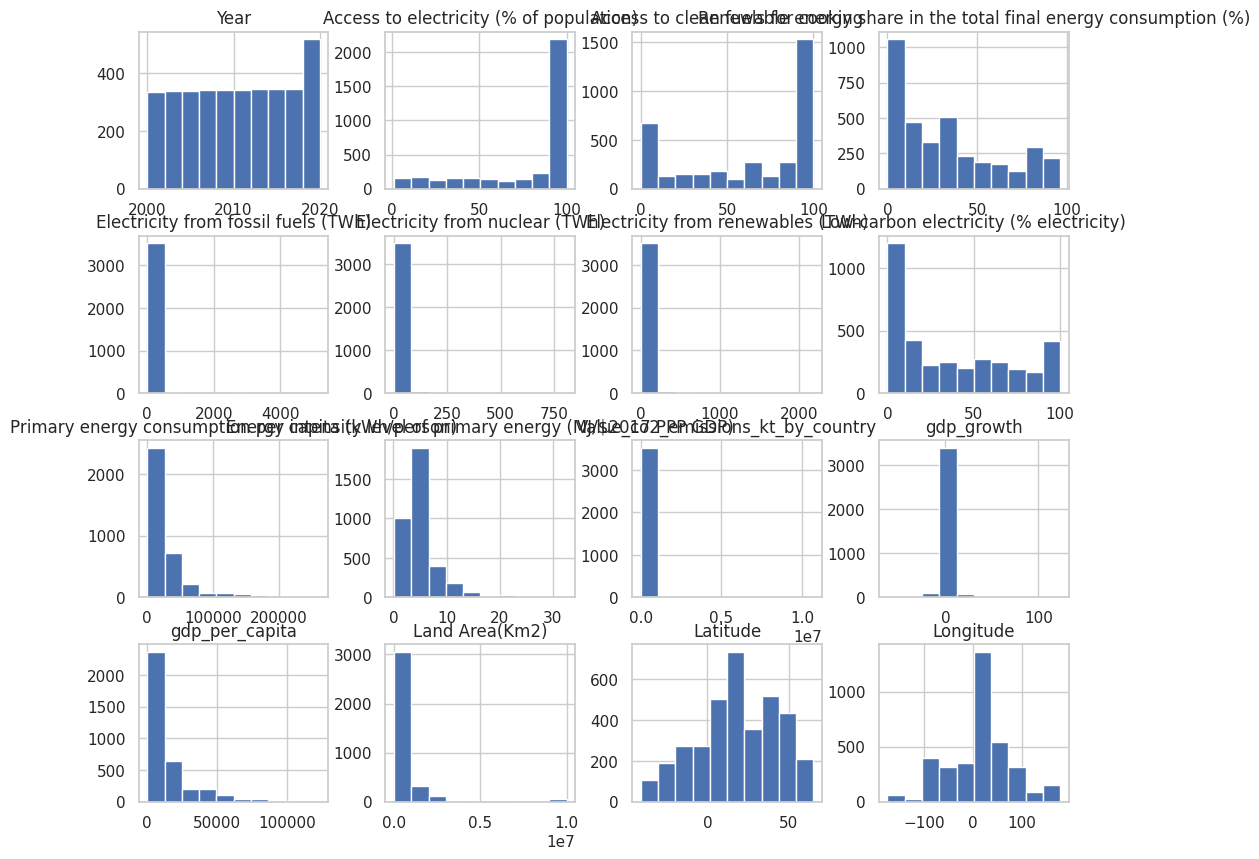

In [ ]:
# Visualize histograms for each numerical column
df.hist(figsize=(12, 10))
plt.show()

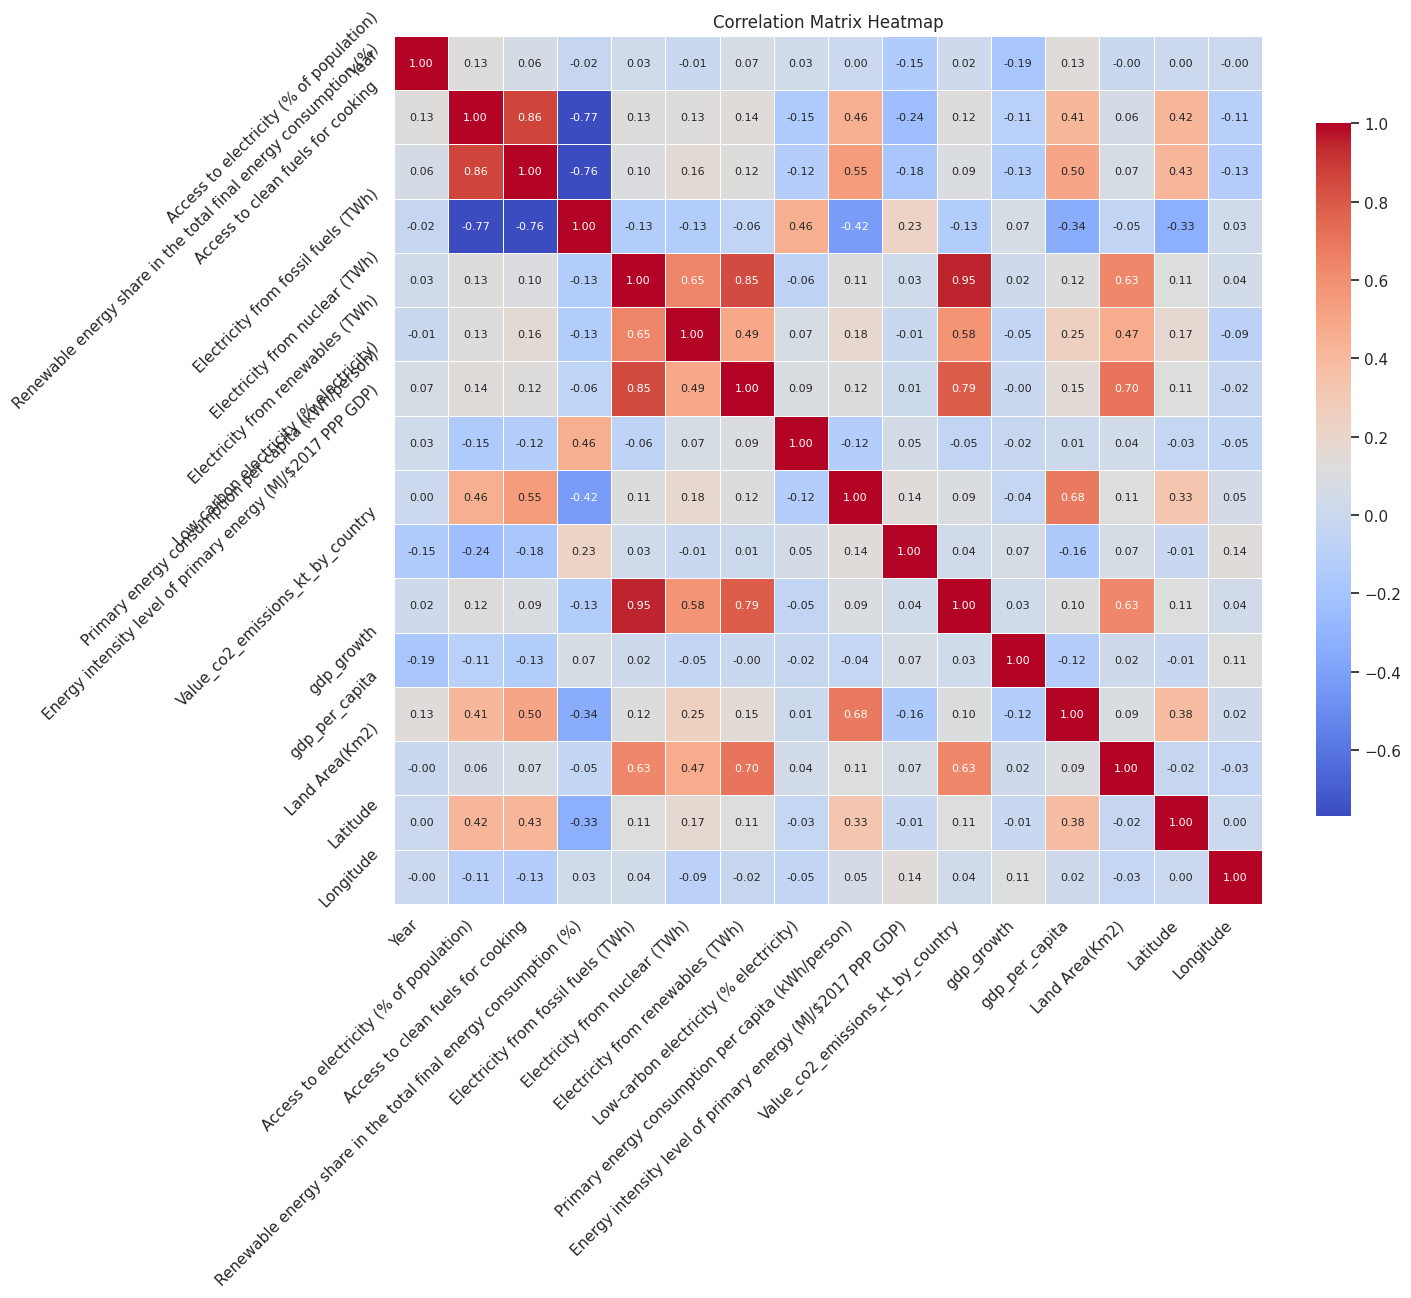

In [19]:
# Increase the figure size for a clearer heatmap
plt.figure(figsize=(14, 12))
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()

The observations from the above correlation matrix :-

**Overall Observations:**

1. **Strong Correlation between Access to Electricity and Clean Fuels:** Access to electricity and clean fuels for cooking show a strong positive correlation (0.86). This suggests that regions with better access to electricity are likely to also have better access to clean cooking fuels.

2. **Energy Sources and CO2 Emissions:** There's a moderate positive correlation between electricity from fossil fuels and CO2 emissions (0.95), indicating that countries relying heavily on fossil fuels for electricity generation tend to have higher CO2 emissions.

3. **GDP and Energy Consumption:** GDP per capita and primary energy consumption per capita show a moderate positive correlation (0.68), suggesting that higher income levels are associated with greater energy consumption.

4. **Renewable Energy and Fossil Fuels:** Renewable energy share in total final energy consumption has a moderate negative correlation with electricity from fossil fuels (-0.76), indicating that countries with a higher share of renewable energy tend to rely less on fossil fuels for electricity generation.

5. **Geographic Factors:** Latitude shows a moderate negative correlation with CO2 emissions (-0.6), suggesting that countries with higher latitudes (closer to the poles) generally have lower CO2 emissions.

**Specific Observations:**

* **Strong Correlations:** The strong correlation between access to electricity and clean fuels highlights the potential for electrification to improve access to cleaner cooking options.
* **Energy Transition:** The moderate negative correlation between renewable energy share and fossil fuel electricity suggests that countries are transitioning towards cleaner energy sources.
* **Economic Development:** The correlation between GDP per capita and energy consumption indicates that economic growth is often associated with increased energy demand.



In [14]:
# Print the column names
print(df.columns)
grouped_data = df.groupby('Entity').mean()
grouped_data.head(10)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')


Year  Access to electricity (% of population)  \
Entity                                                                 
Afghanistan          2010.0                                52.520488   
Albania              2010.0                                99.981429   
Algeria              2010.0                                99.108146   
Angola               2010.0                                35.138564   
Antigua and Barbuda  2010.0                                98.823761   
Argentina            2010.0                                98.241525   
Armenia              2010.0                                99.498020   
Aruba                2010.0                                99.286509   
Australia            2010.0                               100.000000   
Austria              2010.0                               100.000000   

                     Access to clean fuels for cooking  \
Entity                                                   
Afghanistan                                  19.802381   
Albania                                      63.592857   
Algeria                                      98.904762   
Angola                                       44.933333   
Antigua and Barbuda                         100.000000   
Argentina                                    98.469048   
Armenia                                      93.661905   
Aruba                                        63.255287   
Australia                                   100.000000   
Austria                                     100.000000   

                     Renewable energy share in the total final energy consumption (%)  \
Entity                                                                                  
Afghanistan                                                  26.011817                  
Albania                                                      32.638165                  
Algeria                                                       1.827532                  
Angola                                                       56.503722                  
Antigua and Barbuda                                           1.745151                  
Argentina                                                    10.659436                  
Armenia                                                       9.699913                  
Aruba                                                         4.872770                  
Australia                                                     9.427055                  
Austria                                                      30.228484                  

                     Electricity from fossil fuels (TWh)  \
Entity                                                     
Afghanistan                                     0.189524   
Albania                                         0.048571   
Algeria                                        46.895714   
Angola                                          2.040476   
Antigua and Barbuda                             0.271429   
Argentina                                      76.309524   
Armenia                                         2.210476   
Aruba                                           0.785238   
Australia                                     201.980476   
Austria                                        18.101429   

                     Electricity from nuclear (TWh)  \
Entity                                                
Afghanistan                                0.000000   
Albania                                    0.000000   
Algeria                                    0.000000   
Angola                                     0.000000   
Antigua and Barbuda                        0.000000   
Argentina                                  6.722857   
Armenia                                    2.220476   
Aruba                                      0.000000   
Australia                                  0.000000   
Austria                                    0.000000   

          

In [15]:
from sklearn.decomposition import PCA
numeric_cols = grouped_data.select_dtypes(include=['float64', 'int64']).columns
# print(grouped_data.columns)
df_test =grouped_data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_test[numeric_cols])


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_


cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Choose the number of components that explain 95% of the total variance
num_components = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1



pca2 = PCA(n_components=2)
df_pca = pca2.fit_transform(X_scaled)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')
For n_clusters = 2 The average silhouette_score is : 0.543440973109255
For n_clusters = 3 The average silhouette_score is : 0.5924257389113221
For n_clusters = 4 The average silhouette_score is : 0.5967925137761445
For n_clusters = 5 The average silhouette_score is : 0.48820756184245867
For n_clusters = 6 The average silhouette_score is : 0.493697

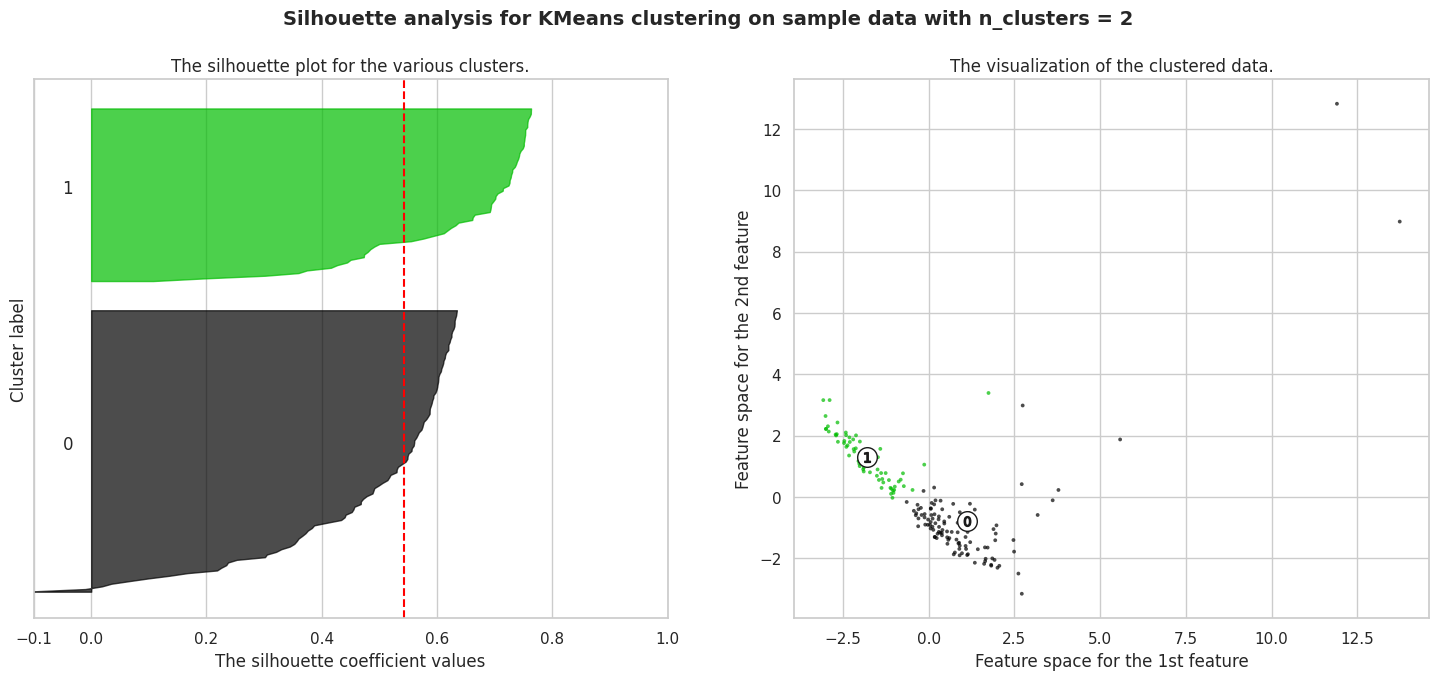

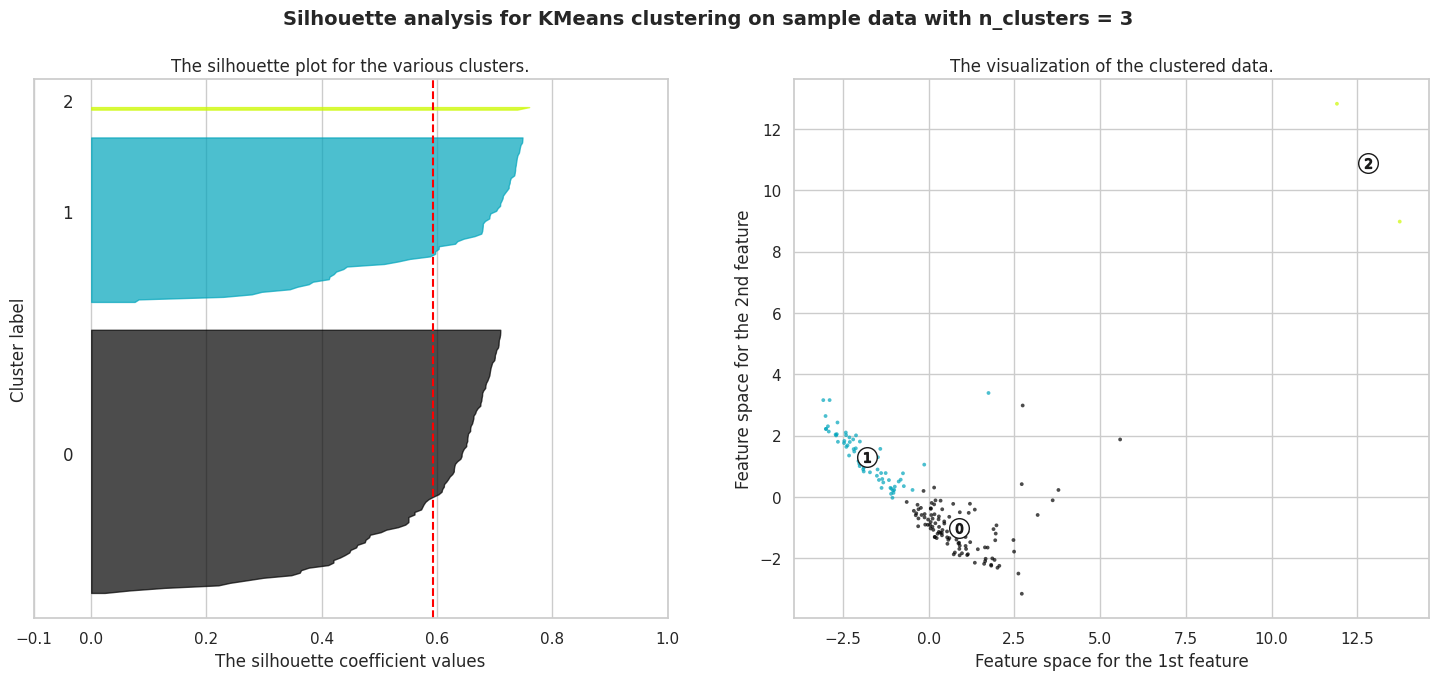

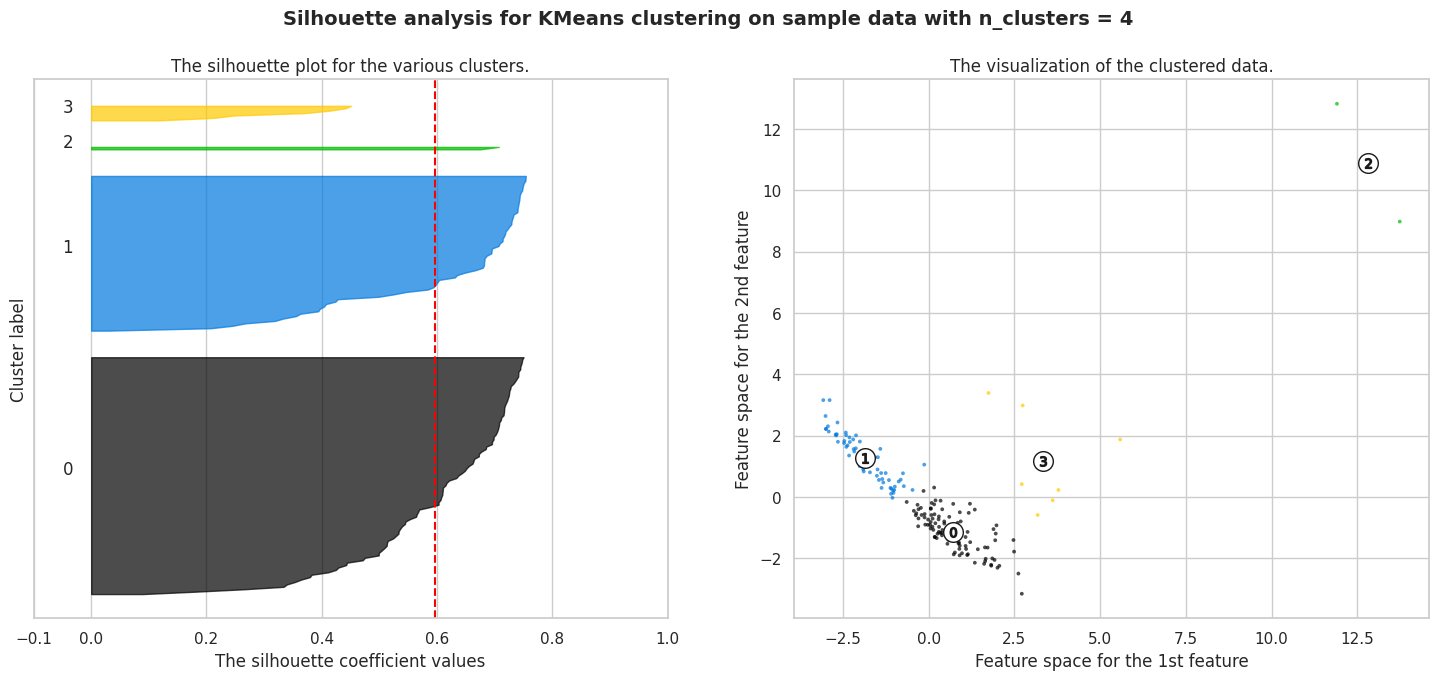

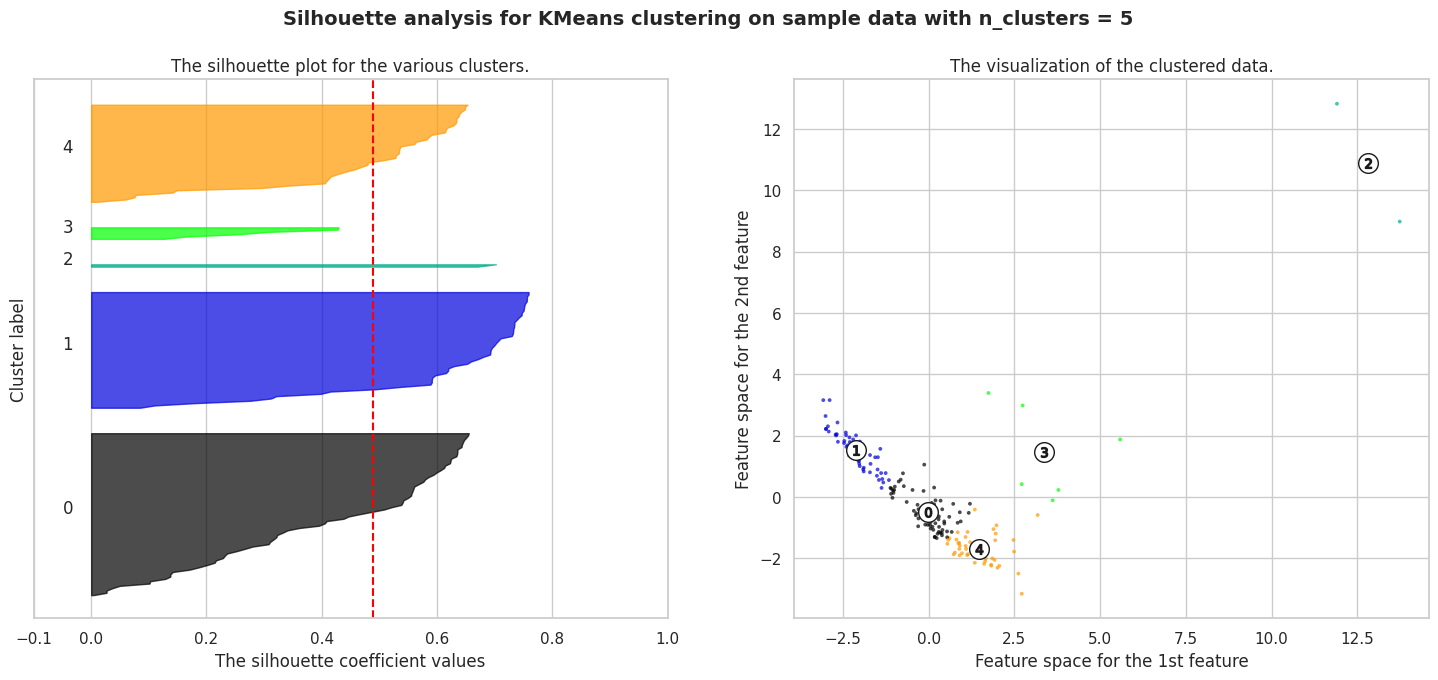

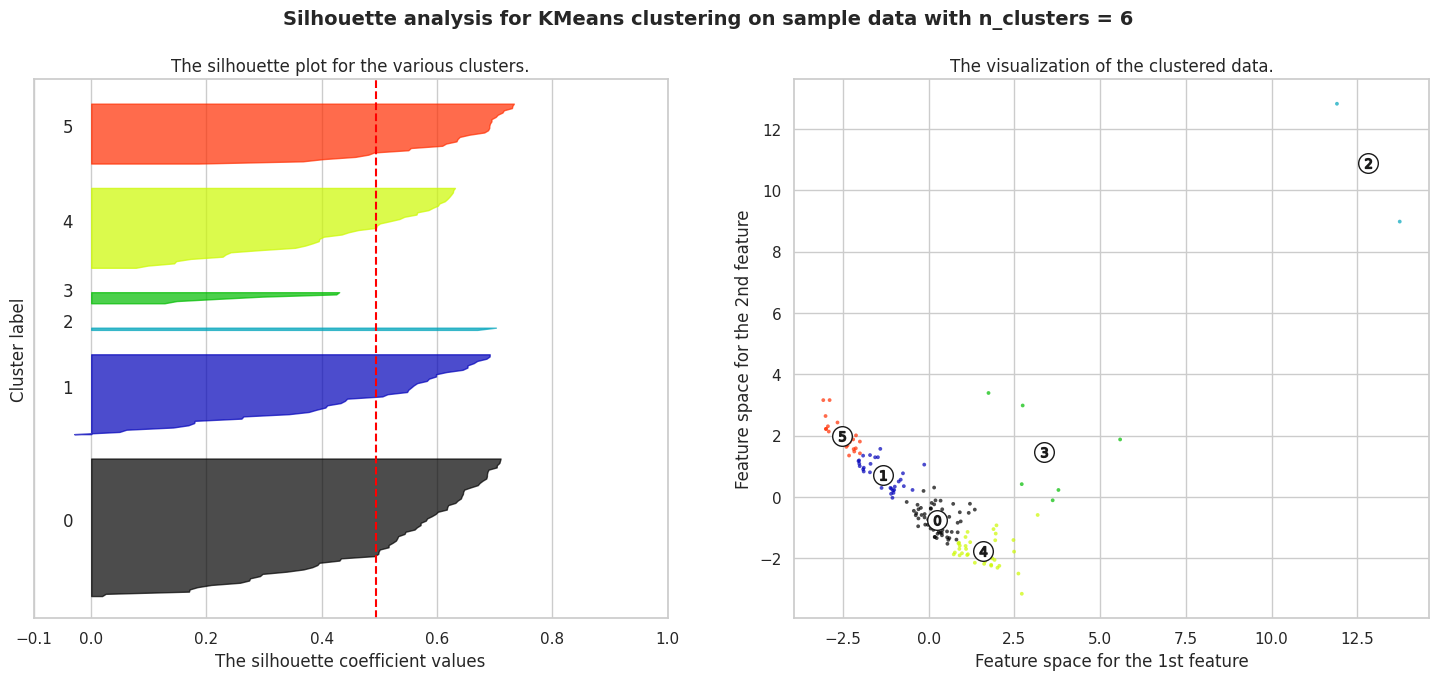

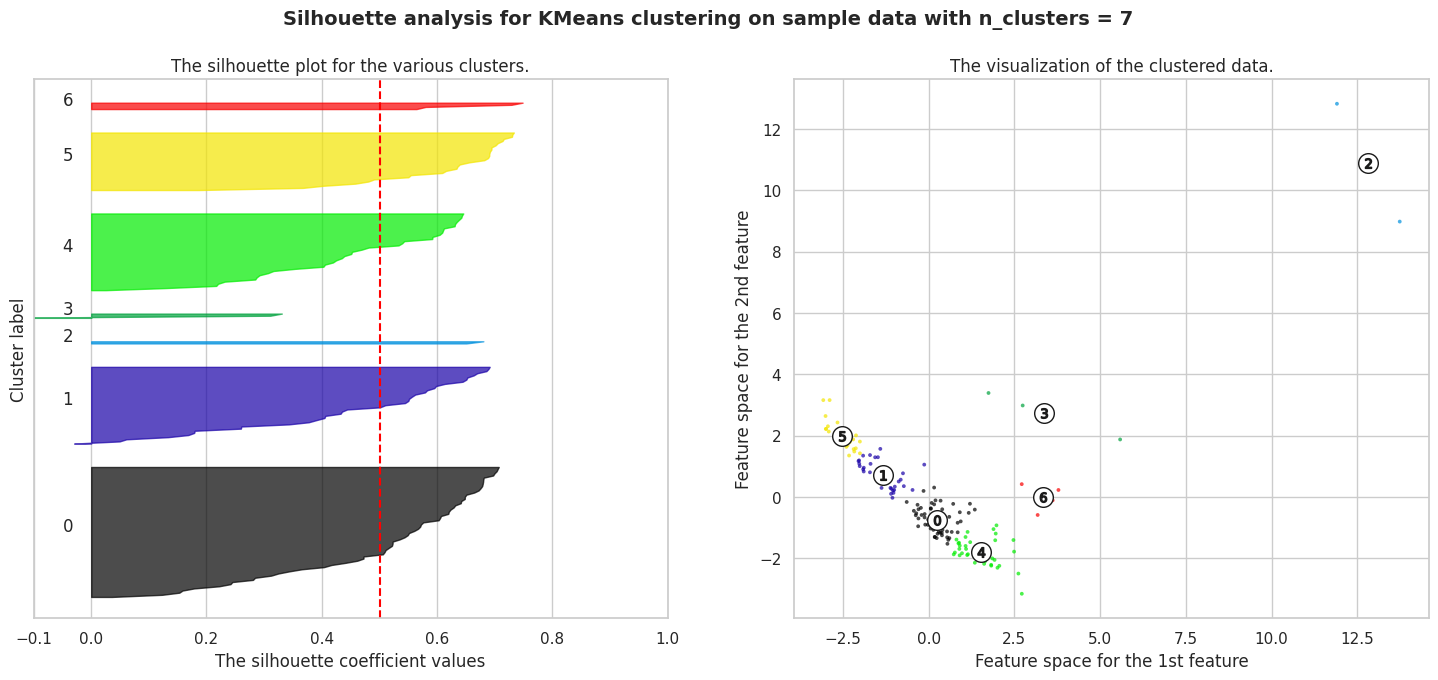

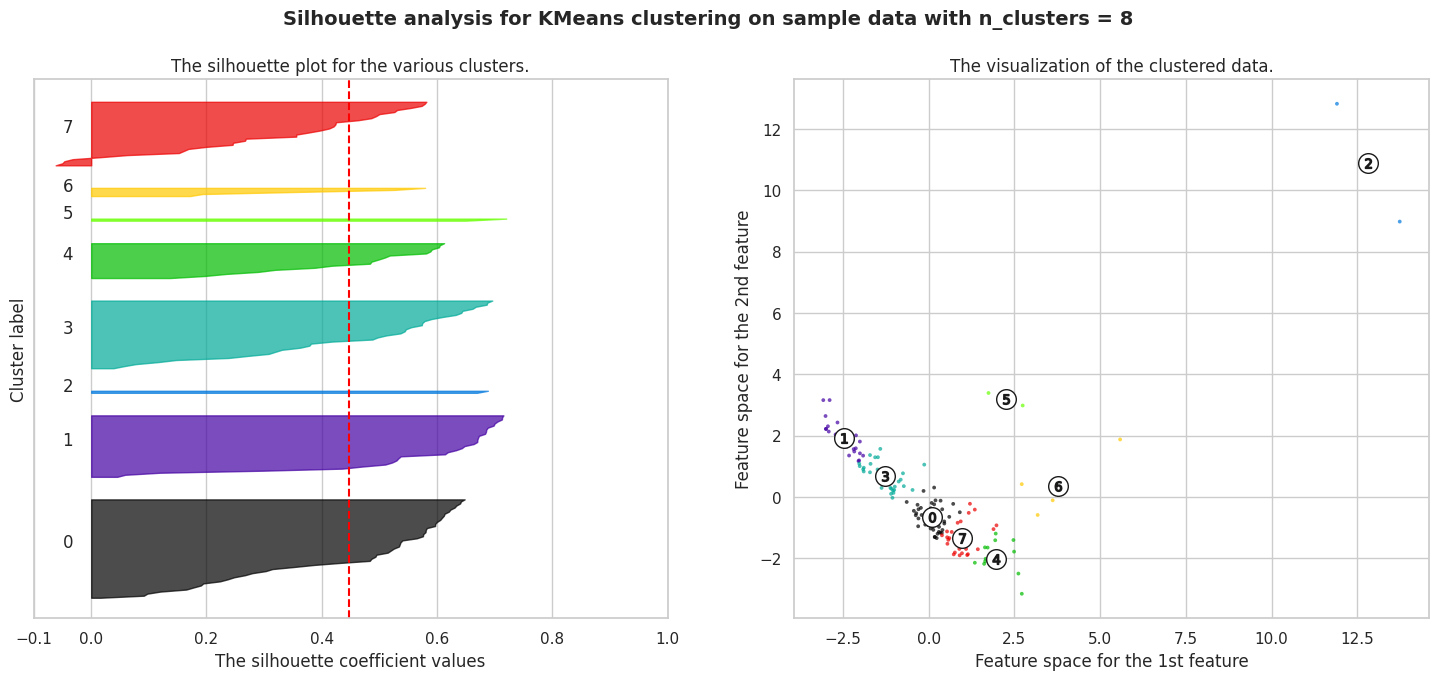

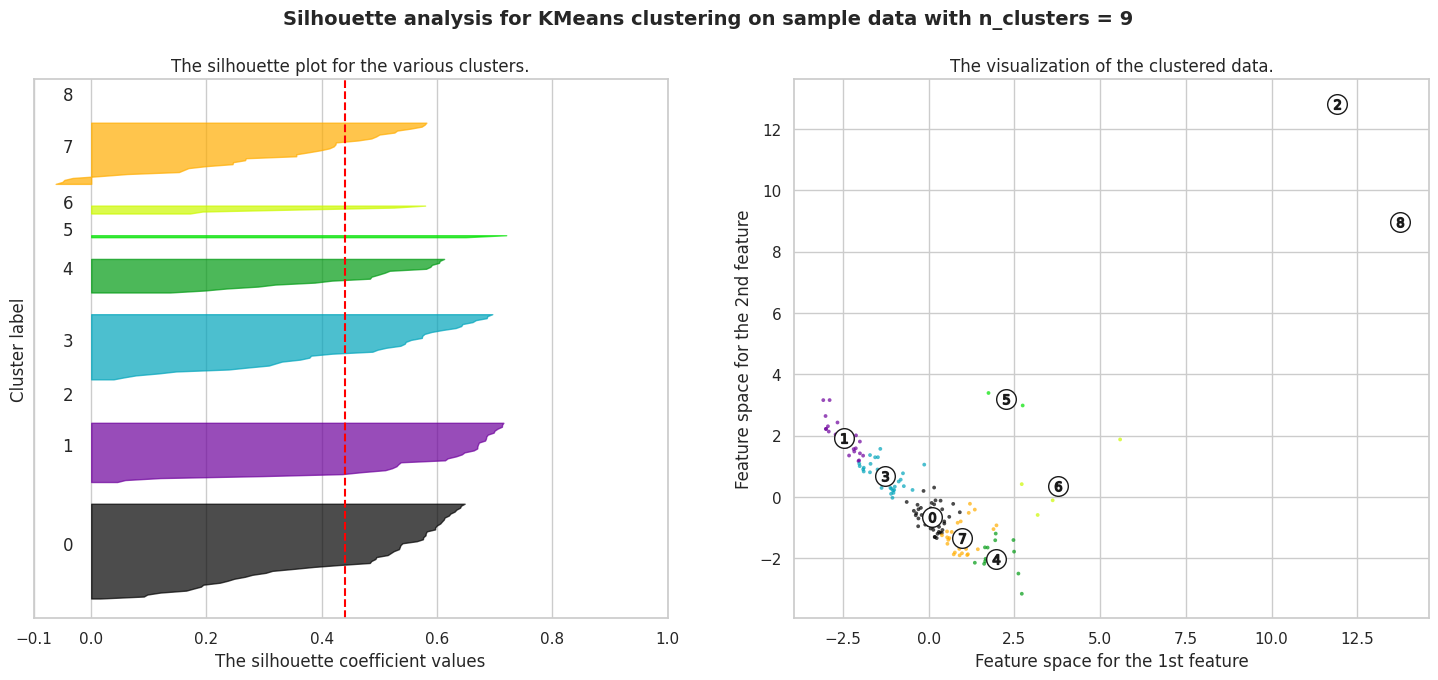

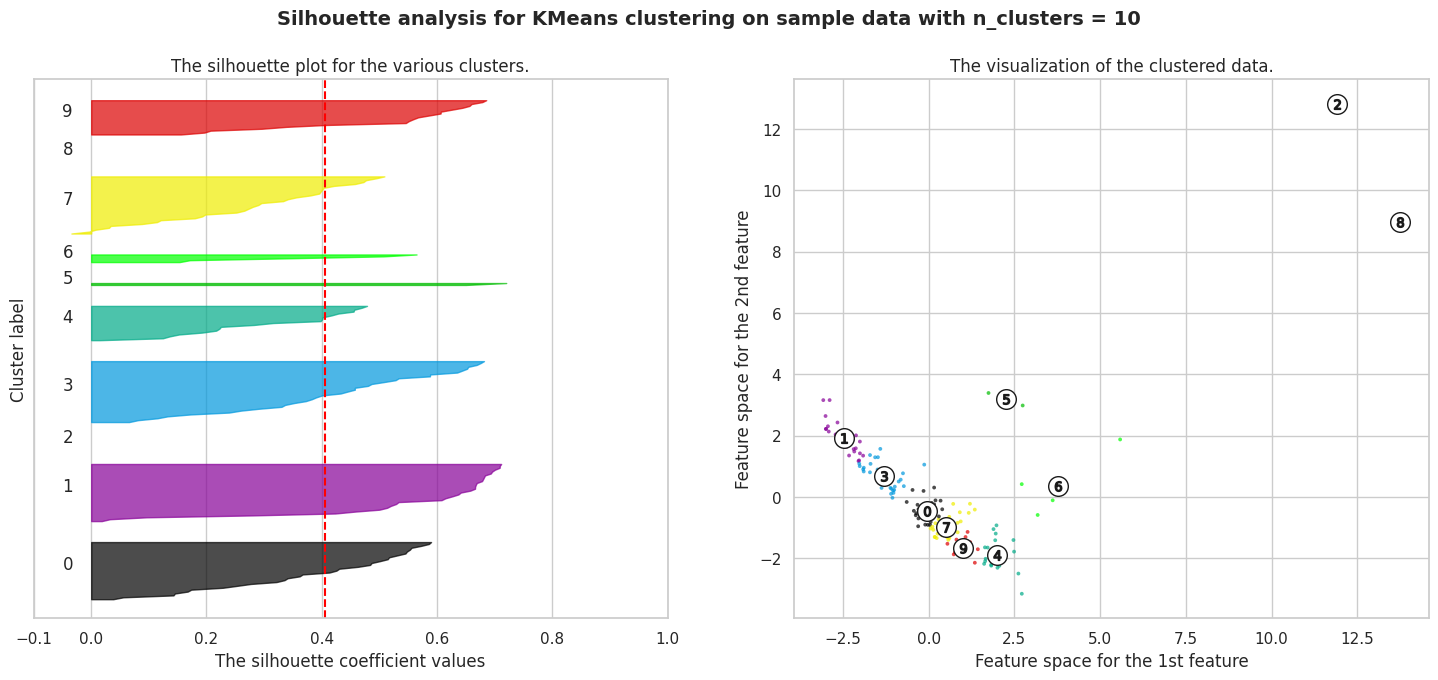

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
# Assuming 'Entity' is a categorical variable
# df = pd.get_dummies(df, columns=['Entity'], drop_first=True)
print(df.columns)

# Define the range of clusters to evaluate
n_clusters_range = range(2, 11)

# Store the country names in a list
country_names = df['Entity'].unique()

for n_clusters in n_clusters_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(df_pca)

    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

let's summarize the observations from the silhouette plots and scatter plots for K-means clustering with n_clusters ranging from 2 to 10.

**Overall Observations:**

* **Silhouette Scores:**
    - Silhouette scores generally decrease as the number of clusters (n_clusters) increases. This suggests that with more clusters, the separation between clusters becomes less distinct, and some points might be assigned to clusters where they don't belong.
    - For n_clusters = 2, the silhouette scores show a moderate separation for one cluster and less clear separation for the other.
    - As n_clusters increases, the proportion of clusters with less clear separation generally increases.

* **Visual Observations:**
    - For n_clusters = 2, the scatter plot shows two distinct clusters, with one appearing more compact and well-separated than the other.
    - As n_clusters increases, the scatter plots show more clusters, but some clusters appear to overlap or have points close to the decision boundaries between them.

**Interpretation:**

* The silhouette analysis suggests that increasing the number of clusters beyond a certain point may not necessarily lead to better clustering results. In fact, it might lead to overfitting, where the model identifies subtle differences within the data that are not meaningful.
* The optimal number of clusters would likely be somewhere between 2 and 7, where the silhouette scores are relatively high and the clusters appear to be well-separated in the scatter plots. However, the optimal number of clusters can vary depending on the specific dataset and the goals of the clustering task.



In [52]:
# Assuming pca is the PCA object
pca_components = pca.components_

print("Shape of PCA components:", pca_components.shape)  # (n_components, n_original_features)


Shape of PCA components: (16, 16)


In [55]:
# Assuming original feature names are in a list
original_features = numeric_cols  # Changed to numeric_cols

# Create a DataFrame to map components to original features
import pandas as pd
pca_contributions = pd.DataFrame(pca_components, columns=original_features)

print(pca_contributions)

        Year  Access to electricity (% of population)  \
0  -0.055706                                 0.317747   
1   0.034101                                -0.309960   
2  -0.025900                                -0.015301   
3  -0.131139                                -0.089382   
4   0.852217                                -0.196399   
5  -0.138285                                 0.038100   
6   0.199362                                 0.195912   
7  -0.374345                                -0.260652   
8   0.023053                                -0.155057   
9   0.213557                                 0.080634   
10 -0.052421                                -0.099139   
11 -0.008335                                 0.085720   
12  0.058971                                 0.535770   
13 -0.001491                                -0.544396   
14 -0.012275                                -0.130936   
15  0.002105                                 0.010586   

    Access to clean fuels for 

In [56]:
# Find the top contributing features for each principal component
top_features_per_pc = pca_contributions.abs().idxmax(axis=1)
print("Top contributing features for each principal component:")
print(top_features_per_pc)


Top contributing features for each principal component:
0                   Electricity from fossil fuels (TWh)
1                     Value_co2_emissions_kt_by_country
2                                             Longitude
3                Low-carbon electricity (% electricity)
4                                                  Year
5     Energy intensity level of primary energy (MJ/$...
6                                              Latitude
7                        Electricity from nuclear (TWh)
8                                            gdp_growth
9                        Electricity from nuclear (TWh)
10                                       Land Area(Km2)
11    Primary energy consumption per capita (kWh/per...
12    Renewable energy share in the total final ener...
13                    Access to clean fuels for cooking
14                    Electricity from renewables (TWh)
15                    Value_co2_emissions_kt_by_country
dtype: object


In [57]:
# Get cluster centers in PCA space
cluster_centers_pca = kmeans.cluster_centers_

print("Cluster centers in PCA space:")
print(cluster_centers_pca)


Cluster centers in PCA space:
[[ 0.71898984 -1.13398386]
 [-1.84895437  1.26588377]
 [12.81968202 10.90479971]
 [ 3.33752506  1.1674796 ]]


In [59]:
# Transform cluster centers back to original feature space
# Use pca2 instead of pca as it was fitted with n_components=2
cluster_centers_original = pca2.inverse_transform(cluster_centers_pca)

# Create a DataFrame to analyze the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=original_features)

print("Cluster centers in original feature space:")
print(cluster_centers_df)


Cluster centers in original feature space:
       Year  Access to electricity (% of population)  \
0 -0.078722                                 0.579946   
1  0.146166                                -0.979873   
2 -0.342270                                 0.693375   
3 -0.146109                                 0.698619   

   Access to clean fuels for cooking  \
0                           0.604385   
1                          -1.012027   
2                           0.550242   
3                           0.692444   

   Renewable energy share in the total final energy consumption (%)  \
0                                          -0.556678                  
1                                           0.930907                  
2                                          -0.483503                  
3                                          -0.632970                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                            -0.149367       

**Note :-**

* **Positive values** indicate that the feature's average value in the cluster is above the dataset's mean.

* **Negative values** indicate that the feature's average value in the cluster is below the dataset's mean.


---

### **Cluster Names and Descriptions**




| Cluster Index | Suggested Name                 | Description                                                                 |
|---------------|--------------------------------|-----------------------------------------------------------------------------|
| 0             | Moderately Developed Countries | Balanced energy access and consumption; low renewable energy reliance.      |
| 1             | Low Energy Access Regions      | Poor energy access; reliance on renewables; low industrial activity.        |
| 2             | High-Industrialized Economies  | Strong industrial economies with high energy production and CO₂ emissions.  |
| 3             | Moderately Industrialized Economies | Transitional economies with balanced energy sources and moderate growth. |

---


In [17]:
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 4

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
clusters_labels = kmeans.fit_predict(df_pca)

# Store the country names in a list
country_names = df['Entity'].unique()

# Extract latitude and longitude columns from the dataframe
latitude_data = dict(zip(df['Entity'], df['Latitude']))
longitude_data = dict(zip(df['Entity'], df['Longitude']))

# Create a dictionary with country names as keys and a tuple (cluster_label, latitude, longitude) as values
countrys_cluster_dict = {
    country: (cluster, latitude_data.get(country), longitude_data.get(country))
    for country, cluster in zip(country_names, clusters_labels)
}

# Print the sorted dictionary
for country, (label, latitude, longitude) in countrys_cluster_dict.items():
    print(f"Country: {country}, Cluster: {label}, Latitude: {latitude}, Longitude: {longitude}")


Country: Afghanistan, Cluster: 1, Latitude: 33.93911, Longitude: 67.709953
Country: Albania, Cluster: 0, Latitude: 41.153332, Longitude: 20.168331
Country: Algeria, Cluster: 0, Latitude: 28.033886, Longitude: 1.659626
Country: Angola, Cluster: 1, Latitude: -11.202692, Longitude: 17.873887
Country: Antigua and Barbuda, Cluster: 0, Latitude: 17.060816, Longitude: -61.796428
Country: Argentina, Cluster: 0, Latitude: -38.416097, Longitude: -63.616672
Country: Armenia, Cluster: 0, Latitude: 40.069099, Longitude: 45.038189
Country: Aruba, Cluster: 0, Latitude: 12.52111, Longitude: -69.96833
Country: Australia, Cluster: 3, Latitude: -25.274398, Longitude: 133.775136
Country: Austria, Cluster: 0, Latitude: 47.516231, Longitude: 14.550072
Country: Azerbaijan, Cluster: 0, Latitude: 40.143105, Longitude: 47.576927
Country: Bahamas, Cluster: 0, Latitude: 25.025885, Longitude: -78.035889
Country: Bahrain, Cluster: 0, Latitude: 26.0667, Longitude: 50.5577
Country: Bangladesh, Cluster: 1, Latitude: 2

In [61]:
import folium


# Initialize the map
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Add clusters to the map
for country, (cluster, latitude, longitude) in countrys_cluster_dict.items():
    if latitude is not None and longitude is not None:  # Ensure latitude and longitude are available
        color = 'blue' if cluster == 0 else 'red' if cluster == 1 else 'green' if cluster == 2 else 'purple'
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,  # Adjust colors for clusters
            fill=True,
            fill_opacity=0.6,
            popup=f"Country: {country}<br>Cluster: {cluster}"
        ).add_to(world_map)

# Display the map
world_map

# Save the map to an HTML file
world_map.save("world_map.html")


Cluster colors to their names and descriptions:

### **Explanation**
- **Blue (Cluster 0)**: Represents countries with moderate development, balanced energy profiles, and reliance on fossil fuels.  
- **Red (Cluster 1)**: Highlights regions with limited energy access and a high reliance on renewable sources.  
- **Green (Cluster 2)**: Denotes highly industrialized economies with high energy production and consumption.  
- **Purple (Cluster 3)**: Shows moderately industrialized economies transitioning toward balanced energy profiles.  



## **Semi-Deployment**

In [62]:

# Cluster descriptions
cluster_descriptions = {
    0: "Moderately Developed Country",
    1: "Low Energy Access Region",
    2: "High-Industrialized Economy",
    3: "Moderately Industrialized Economy"
}

# Function to take user input and display the cluster number and description
def get_country_cluster():
    # Take user input for country name
    country = input("Enter the country name: ")

    # Check if country exists in the dictionary and display the cluster number and description
    if country in countrys_cluster_dict:
        cluster_number = countrys_cluster_dict[country][0]  # Extract the cluster number
        cluster_reason = cluster_descriptions.get(cluster_number, "No description available for this cluster.")
        print(f"The cluster number for {country} is {cluster_number}.")
        print(f"Cluster description: {cluster_reason}")
    else:
        print(f"Country {country} not found in the dictionary.")

# Call the function
get_country_cluster()


Enter the country name: India
The cluster number for India is 3.
Cluster description: Moderately Industrialized Economy


## **Deployment**

In [63]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [19]:
import gradio as gr


# Cluster descriptions
cluster_descriptions = {
    0: "Moderately Developed Country",
    1: "Low Energy Access Region",
    2: "High-Industrialized Economy",
    3: "Moderately Industrialized Economy"
}

# Function to get cluster details
def get_country_cluster_gradio(country):
    # Check if country exists in the dictionary and return the cluster number and description
    if country in countrys_cluster_dict:
        cluster_number = countrys_cluster_dict[country][0]  # Extract the cluster number
        cluster_reason = cluster_descriptions.get(cluster_number, "No description available for this cluster.")
        return str(cluster_number), cluster_reason  # Returning cluster number and description separately
    else:
        return "Not found", ""  # Return "Not found" if country doesn't exist

# Create the Gradio interface
interface = gr.Interface(
    fn=get_country_cluster_gradio,
    inputs=gr.Textbox(label="Enter the country name"),
    outputs=[
        gr.Textbox(label="Cluster Number"),
        gr.Textbox(label="Cluster Description")
    ],
    title="Country Cluster Identifier",
    description="Enter a country's name to find its cluster number and description based on the predefined dataset."
)

# Launch the Gradio app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dd3f980078407cc252.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
